## 利用 Python 语言环境编写实现:
（1） 读入一副图像，对图像添加椒盐噪声或高斯噪声，采用中值滤波、自适应
中值滤波、高斯滤波等实现图像的空域去噪。
（2） 实现图像的傅里叶变换，显示幅度谱和相位谱；实现低通滤波和高通滤波，
通过傅里叶反变换，重构图像并显示，与空域滤波进行比较。
（3） 采用多种滤波算子如 Prewitt、Sobel、拉普拉斯等进行图像的锐化处理。
（4） 读入一副运动模糊图像，或仿真生成一副运动模糊图像，采用维纳滤波进
行图像的复原。
（4）对比显示（原图像在第一行、处理结果图像在第二行）原图像和结果图像。
从平滑/锐化、轮廓模糊/清晰、去噪效果等方面对各个方法进行评估分析。
***

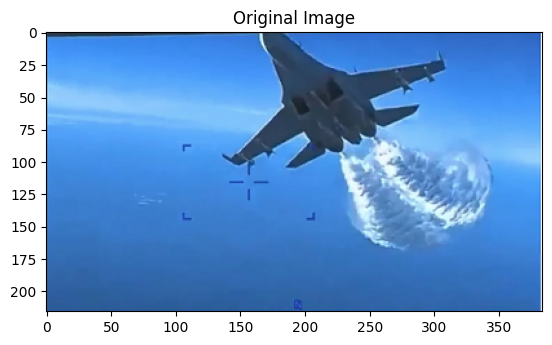

In [1]:
# 导入相应的包
from cv2 import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读入一副图像
img = cv2.imread('test_img.png', 1)

# 显示图像
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

1. 读入一副图像，对图像添加椒盐噪声或高斯噪声，采用中值滤波、自适应中值滤波、高斯滤波等实现图像的空域去噪。

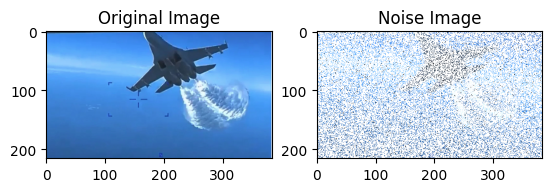

In [2]:
# 添加椒盐噪声
noise_img = img.copy()
sp_noise = np.random.randint(0, 1000, size=(img.shape[0], img.shape[1]))
sp_noise[sp_noise < 15] = 0  # 生成椒噪声
sp_noise[sp_noise > 240] = 255  # 生成盐噪声
noise_img[np.where(sp_noise == 0)] = 0  # 添加椒噪声
noise_img[np.where(sp_noise == 255)] = 255  # 添加盐噪声

# 显示图像
plt.subplot(1, 2, 1)  # 第一行的第一个位置
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)  # 第一行的第二个位置
plt.imshow(cv2.cvtColor(noise_img, cv2.COLOR_BGR2RGB))
plt.title('Noise Image')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


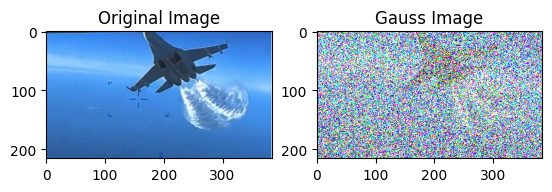

In [3]:
# 读入一副图像
img = cv2.imread('test_img.png', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 添加高斯噪声
gauss_noise = np.random.normal(0, 300, img.shape)
gauss_noise_img = img.astype('float') + gauss_noise  # 加上高斯噪声
gauss_noise_img[gauss_noise_img < 0] = 0  # 限制像素值范围
gauss_noise_img[gauss_noise_img > 255] = 255

# 显示图像
plt.subplot(1, 2, 1)  # 第一行的第一个位置
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)  # 第一行的第二个位置
plt.imshow(gauss_noise_img)
plt.title('Gauss Image')

plt.show()

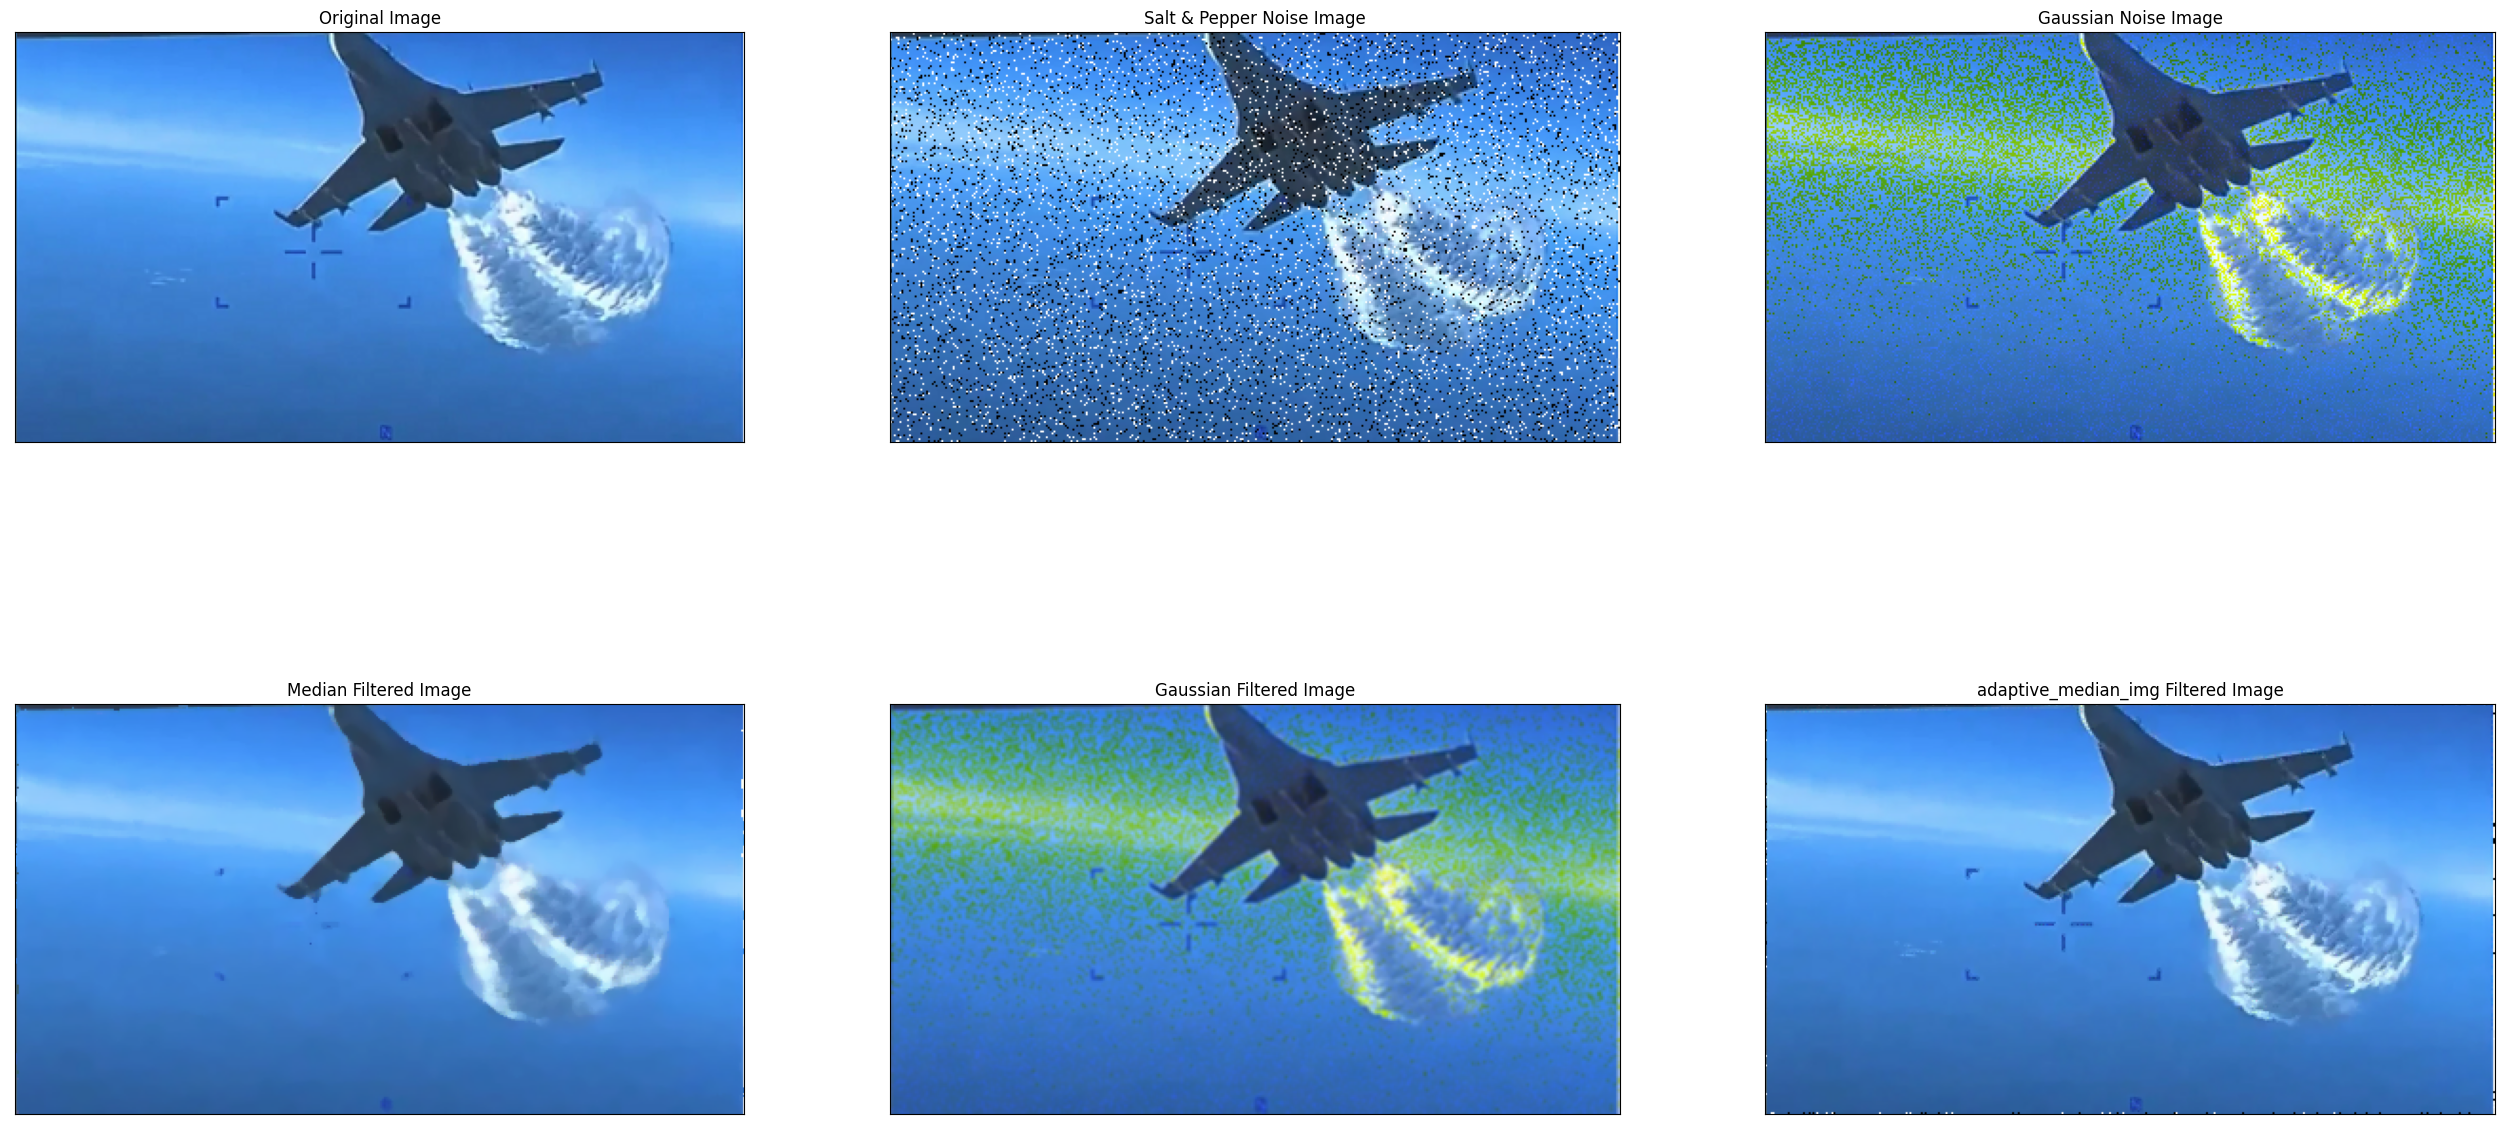

In [4]:
# 读入一副图像
img = cv2.imread('test_img.png', 1)

# 添加椒盐噪声和高斯噪声
# 添加椒盐噪声
noise_img = img.copy()
sp_noise = np.random.randint(0, 255, size=(img.shape[0], img.shape[1]))
sp_noise[sp_noise < 15] = 0  # 生成椒噪声
sp_noise[sp_noise > 240] = 255  # 生成盐噪声
noise_img[np.where(sp_noise == 0)] = 0  # 添加椒噪声
noise_img[np.where(sp_noise == 255)] = 255  # 添加盐噪声

gauss_noise = np.zeros_like(img)
cv2.randn(gauss_noise, 0, 30)
gauss_noise_img = img + gauss_noise

# 中值滤波
median_img = cv2.medianBlur(noise_img, 5)

# 自适应中值滤波
adaptive_median_img = noise_img.copy()
for i in range(1, adaptive_median_img.shape[0]-1):
    for j in range(1, adaptive_median_img.shape[1]-1):
        for k in range(3):
            w = img[i-1:i+2, j-1:j+2, k]
            w_min = np.min(w)
            w_max = np.max(w)
            w_median = np.median(w)
            zxy = img[i, j, k]
            if w_min < zxy < w_max:
                adaptive_median_img[i, j, k] = zxy
            else:
                adaptive_median_img[i, j, k] = w_median

# 高斯滤波
gaussian_img = cv2.GaussianBlur(gauss_noise_img, (3, 3), 0)

# 显示原图、加噪声后的图像和各种滤波后的图像
plt.figure(figsize=(32, 16))
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(noise_img, cv2.COLOR_BGR2RGB))
plt.title('Salt & Pepper Noise Image')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(gauss_noise_img, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Noise Image')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(median_img, cv2.COLOR_BGR2RGB))
plt.title('Median Filtered Image')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(gaussian_img, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Filtered Image')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(adaptive_median_img, cv2.COLOR_BGR2RGB))
plt.title('adaptive_median_img Filtered Image')
plt.xticks([]), plt.yticks([])

plt.show()


2. 实现图像的傅里叶变换，显示幅度谱和相位谱；实现低通滤波和高通滤波，
通过傅里叶反变换，重构图像并显示，与空域滤波进行比较。

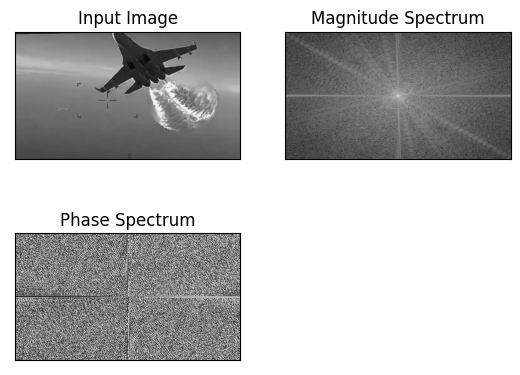

In [5]:
img = cv2.imread('test_img.png', 0)

# 进行傅里叶变换
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# 计算幅度谱和相位谱
magnitude_spectrum = 20 * np.log(np.abs(fshift))
phase_spectrum = np.angle(fshift)

# 显示原图像和频谱图像
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


C:\Users\Habsburg G.Qv\AppData\Local\Temp\ipykernel_1860\589721770.py:12: RuntimeWarning: divide by zero encountered in log
  phA = np.log(np.angle(fA) * 180 / np.pi)  # 获得傅里叶变换的相位谱
C:\Users\Habsburg G.Qv\AppData\Local\Temp\ipykernel_1860\589721770.py:12: RuntimeWarning: invalid value encountered in log
  phA = np.log(np.angle(fA) * 180 / np.pi)  # 获得傅里叶变换的相位谱
C:\Users\Habsburg G.Qv\AppData\Local\Temp\ipykernel_1860\589721770.py:40: RuntimeWarning: divide by zero encountered in log
  res = np.log(np.abs(dft_shift))
C:\Users\Habsburg G.Qv\AppData\Local\Temp\ipykernel_1860\589721770.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.subplot(336), plt.imshow(np.int8(fA)), plt.title('频谱'), plt.xticks([]), plt.yticks([])
C:\Users\Habsburg G.Qv\AppData\Local\Temp\ipykernel_1860\589721770.py:51: RuntimeWarning: divide by zero encountered in log
  lres = np.log(np.abs(ldft_shift))


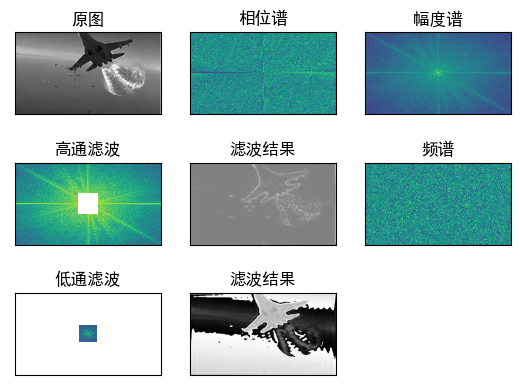

In [13]:
import numpy.fft as fft
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

pic = cv2.imread('test_img.png')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)

FA = fft.fft2(pic)  # 对图像进行傅里叶变换
fA = fft.fftshift(FA)  # 对图像频谱进行移动，是0频率点在中心
sA = np.log(np.abs(fA))  # 获得傅里叶变换的幅度谱
phase_spectrum = np.angle(fshift)
phA = np.log(np.angle(fA) * 180 / np.pi)  # 获得傅里叶变换的相位谱

plt.subplot(331), plt.imshow(pic, cmap='gray'), plt.title('原图'), plt.xticks([]), plt.yticks([])
# plt.subplot(332), plt.imshow(phA, cmap='gray'), plt.title('相位谱')
plt.subplot(332), plt.imshow(phase_spectrum)
plt.title('相位谱'), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(sA), plt.title('幅度谱'), plt.xticks([]), plt.yticks([])


def highPassFiltering(img, size):  # 传递参数为傅里叶变换后的频谱图和滤波尺寸
    h, w = img.shape[0:2]  # 获取图像属性
    h1, w1 = int(h / 2), int(w / 2)  # 找到傅里叶频谱图的中心点
    img[h1 - int(size / 2):h1 + int(size / 2),
    w1 - int(size / 2):w1 + int(size / 2)] = 0  # 中心点加减滤波尺寸的一半，刚好形成一个定义尺寸的滤波大小，然后设置为0
    return img


def lowPassFiltering(img, size):  # 传递参数为傅里叶变换后的频谱图和滤波尺寸
    h, w = img.shape[0:2]  # 获取图像属性
    h1, w1 = int(h / 2), int(w / 2)  # 找到傅里叶频谱图的中心点
    img2 = np.zeros((h, w), np.uint8)  # 定义空白黑色图像，和傅里叶变换传递的图尺寸一致
    img2[h1 - int(size / 2):h1 + int(size / 2),
    w1 - int(size / 2):w1 + int(size / 2)] = 1  # 中心点加减滤波尺寸的一半，刚好形成一个定义尺寸的滤波大小，然后设置为1，保留低频部分
    img3 = img2 * img  # 将定义的低通滤波与传入的傅里叶频谱图一一对应相乘，得到低通滤波
    return img3


dft_shift = highPassFiltering(fA, 50)
res = np.log(np.abs(dft_shift))
idft_shift = np.fft.ifftshift(dft_shift)  # 将频域从中间移动到左上角
ifimg = np.fft.ifft2(idft_shift)  # 傅里叶库函数调用
ifimg = np.abs(ifimg)

plt.subplot(334), plt.imshow(res), plt.title('高通滤波'), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(np.int8(ifimg), 'gray'), plt.title('滤波结果'), plt.xticks([]), plt.yticks([])

fA = fft.fftshift(FA)
plt.subplot(336), plt.imshow(np.int8(fA)), plt.title('频谱'), plt.xticks([]), plt.yticks([])
ldft_shift = lowPassFiltering(fA, 50)
lres = np.log(np.abs(ldft_shift))

# 傅里叶逆变换
lidft_shift = np.fft.ifftshift(ldft_shift)  # 将频域从中间移动到左上角
lifimg = np.fft.ifft2(lidft_shift)  # 傅里叶库函数调用
lifimg = np.abs(lifimg)

plt.subplot(337), plt.imshow(lres), plt.title('低通滤波'), plt.xticks([]), plt.yticks([])
plt.subplot(338), plt.imshow(np.int8(lifimg), 'gray'), plt.title('滤波结果'), plt.xticks([]), plt.yticks([])
plt.show()

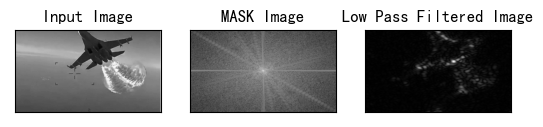

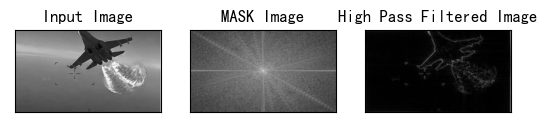

In [7]:
# 构建一个低通滤波器，滤波半径为30
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
mask = np.zeros((rows, cols), np.uint8)
r = 30
cv2.circle(mask, (crow, ccol), r, 255, -1)

# 对频谱进行掩模操作
fshift_filtered = fshift * mask

res = np.log(np.abs(fshift))

# 进行傅里叶反变换
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# 显示空域滤波和频域滤波后的图像
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(res, cmap='gray')
plt.title('MASK Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back, cmap='gray')
plt.title('Low Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

# 构建一个高通滤波器，滤波半径为30
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.ones((rows, cols), np.uint8)
r = 30
mask[crow-r:crow+r+1, ccol-r:ccol+r+1] = 0

# 对频谱进行掩模操作
fshift_filtered = fshift * mask
res = np.log(np.abs(fshift))

# 进行傅里叶反变换
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# 显示空域滤波和频域滤波后的图像
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(res, cmap='gray')
plt.title('MASK Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back, cmap='gray')
plt.title('High Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

3. 采用多种滤波算子如 Prewitt、Sobel、拉普拉斯等进行图像的锐化处理。

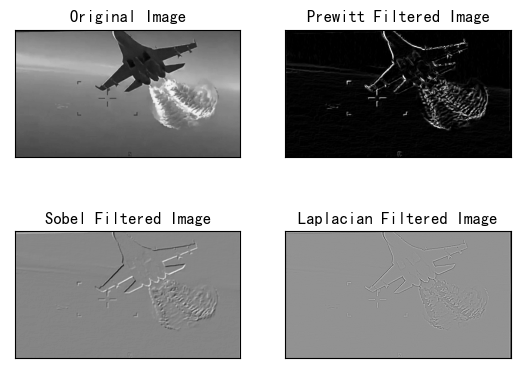

In [8]:
# 读入图像
img = cv2.imread('test_img.png', cv2.IMREAD_GRAYSCALE)

# Prewitt算子锐化
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
img_prewittx = cv2.filter2D(img, -1, kernelx)
img_prewitty = cv2.filter2D(img, -1, kernely)
img_prewitt = img_prewittx + img_prewitty
img_prewitt = cv2.normalize(img_prewitt, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

# Sobel算子锐化
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
img_sobel = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
img_sobel = cv2.normalize(img_sobel, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

# Laplacian算子锐化
laplacian = cv2.Laplacian(img, cv2.CV_64F)
img_laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

# 显示结果
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_prewitt, cmap='gray')
plt.title('Prewitt Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_sobel, cmap='gray')
plt.title('Sobel Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img_laplacian, cmap='gray')
plt.title('Laplacian Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

4. 读入一副运动模糊图像，或仿真生成一副运动模糊图像，采用维纳滤波进
行图像的复原。

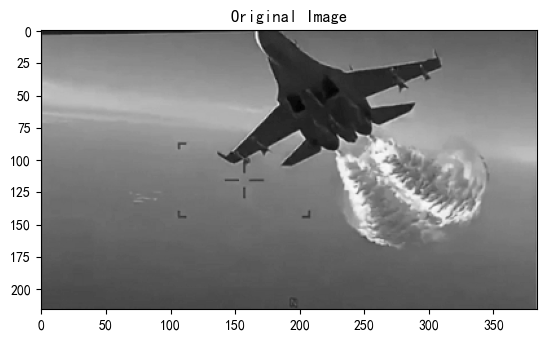

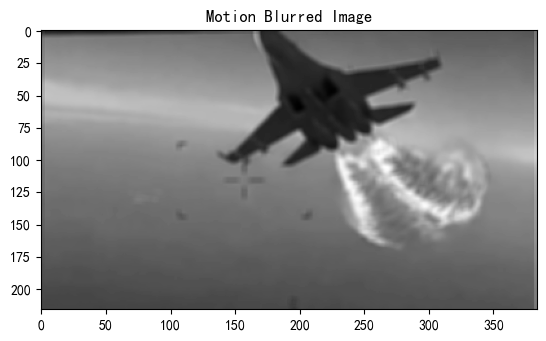

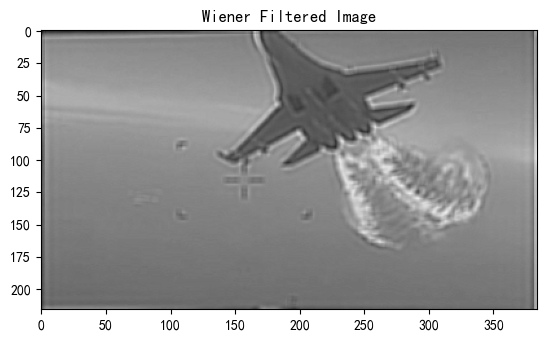

In [9]:
# 读入运动模糊图像
# img = cv2.imread('motion_blur.jpg', 0)
img = cv2.imread('test_img.png', 0)

# 显示原图
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

# 运动模糊核的大小和方向
size = 5
theta = 45

# 生成运动模糊核
kernel = np.zeros((size, size))
center = size // 2
for i in range(size):
    kernel[i, center] = 1
    for j in range(1, center + 1):
        offset = int(np.round(j * np.tan(theta * np.pi / 180)))
        kernel[i, max(center - offset, 0)] = 1
        kernel[i, min(center + offset, size - 1)] = 1
kernel = kernel / np.sum(kernel)

# 进行运动模糊
blurred = cv2.filter2D(img, -1, kernel)

# 显示运动模糊图像
plt.imshow(blurred, cmap='gray')
plt.title('Motion Blurred Image')
plt.show()

# 计算PSD，用于维纳滤波
psd = np.abs(np.fft.fft2(kernel, (img.shape[0], img.shape[1])))**2
psd[psd < 0.1*np.max(psd)] = 0.1*np.max(psd)  # 防止除零错误

# 进行维纳滤波
snr = 0.01  # 信噪比
wiener_kernel = np.conj(psd) / (np.abs(psd)**2 + snr)
wiener_filtered = np.real(np.fft.ifft2(np.fft.fft2(blurred) * wiener_kernel))

# 显示维纳滤波复原图像
plt.imshow(wiener_filtered, cmap='gray')
plt.title('Wiener Filtered Image')
plt.show()